In [130]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [131]:
df = pd.read_csv("../../data/energy/df.csv", )
# regr = linear_model.LinearRegression()

In [132]:
df = df[df.label!=0]

In [162]:
# Establish the target variable
y = df['energy']

# Establish the predictior variables
X = df[['pos_x', 'pos_y', 'pos_z',
        'dir_x', 'dir_y', 'dir_z',
        'tot', 'time', 'label']]

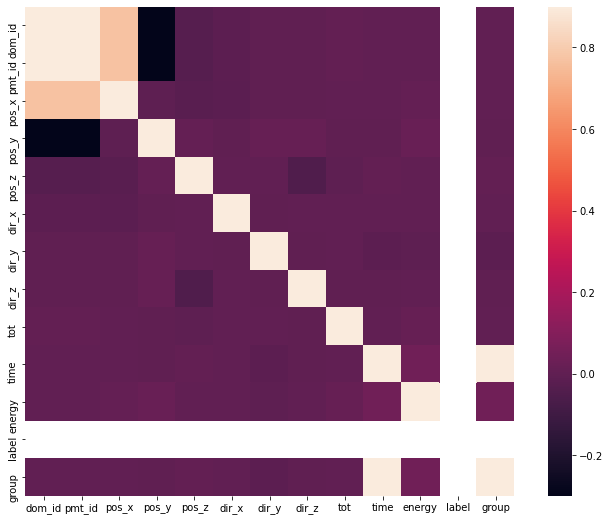

In [163]:
# EDA

corr_matrix = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

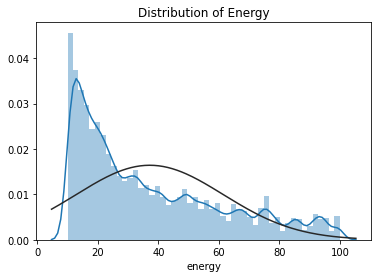

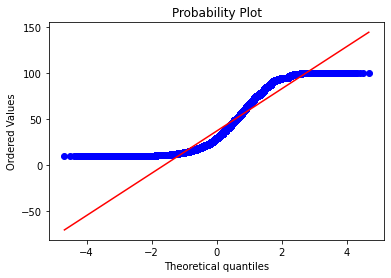

In [164]:
sns.distplot(y, fit=stats.norm).set_title("Distribution of Energy")

# probability plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)

In [165]:
y.skew()

0.8826858180493037

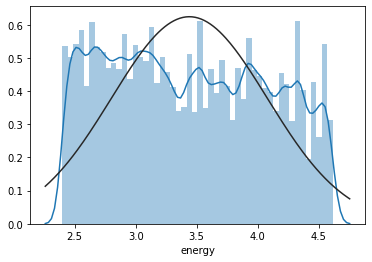

In [166]:
log_y = np.log1p(y)
log_y.skew()

#Check the new distribution after log transformation 
sns.distplot(log_y , fit=stats.norm)

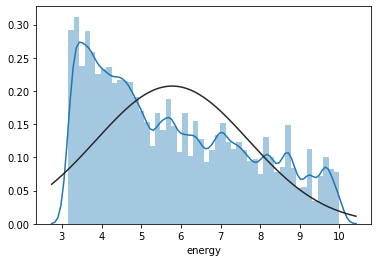

In [167]:
sq_y = np.sqrt(y)
sq_y.skew()
sns.distplot(sq_y , fit=stats.norm)

In [168]:
len(X)

489906

In [169]:
0.8 * 489906

391924.80000000005

In [170]:
len(X) - 391924

97982

In [171]:
0.5*97982

48991.0

In [172]:
hold_X = X[-391924:]
hold_y = y[-391924:]

In [173]:
n=391924
X.drop(X.tail(n).index,inplace=True) # drop last n rows

/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [182]:
log_y.drop(log_y.tail(n).index,inplace=True) # drop last n rows

In [183]:
len(X)*0.5

48991.0

In [184]:
# Split the data into training/testing sets
X_train = X[:-48991]
X_test = X[-48991:]

# Split the targets into training/testing sets
y_train = log_y[:-48991]
y_test = log_y[-48991:]

In [185]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [186]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [187]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [188]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.55271946e-04 -1.93120866e-04 -1.37444237e-03  4.32013991e-02
  9.74192286e-03  8.95194052e-03  1.72951289e-03  4.07899847e-08
  0.00000000e+00]
Mean squared error: 0.50
Coefficient of determination: -0.12


In [189]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))

([], <a list of 0 Text major ticklabel objects>)

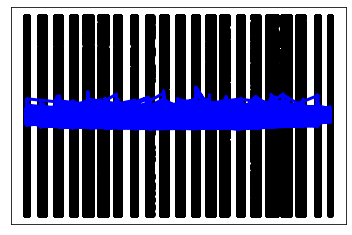

In [101]:
# Plot outputs
plt.scatter(X_test['pos_x'], y_test,  color='black')
plt.plot(X_test['pos_x'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

([], <a list of 0 Text major ticklabel objects>)

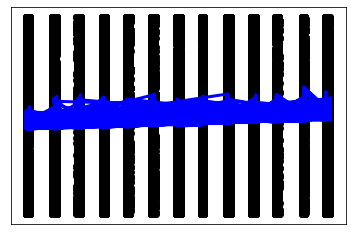

In [102]:
plt.scatter(X_test['pos_y'], y_test,  color='black')
plt.plot(X_test['pos_y'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

([], <a list of 0 Text major ticklabel objects>)

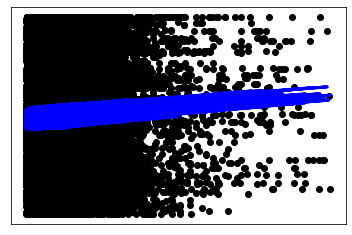

In [103]:
plt.scatter(X_test['tot'], y_test,  color='black')
plt.plot(X_test['tot'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

([], <a list of 0 Text major ticklabel objects>)

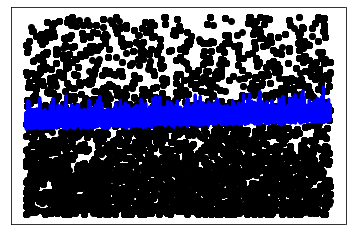

In [104]:
plt.scatter(X_test['time'], y_test,  color='black')
plt.plot(X_test['time'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

([], <a list of 0 Text major ticklabel objects>)

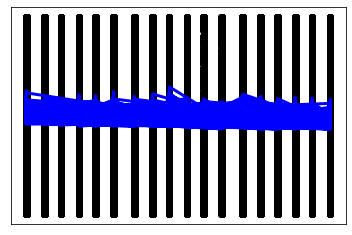

In [105]:
plt.scatter(X_test['pos_z'], y_test,  color='black')
plt.plot(X_test['pos_z'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

# PREDICT

In [190]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

-0.12400773325205905


In [228]:
Xnew = hold_X[:5]
Xnew

,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
8760071,50.931,-95.068,121.959,-0.478,0.827,0.296,24.0,19126805.0,1
8760077,1.516,-41.629,122.011,0.000,-0.830,0.558,27.0,19126810.0,1
8760080,-26.345,-95.033,112.441,0.827,-0.478,-0.296,27.0,19126814.0,1
8760082,39.995,-115.326,112.611,0.719,0.415,0.558,25.0,19126822.0,1
8760083,11.599,-57.946,83.559,0.478,-0.827,0.296,25.0,19126823.0,1


In [229]:
ynew = loaded_model.predict(Xnew)

In [230]:
print("X=%s, Predicted=%s" % (Xnew, ynew))

X=          pos_x    pos_y    pos_z  dir_x  dir_y  dir_z   tot        time  \
8760071  50.931  -95.068  121.959 -0.478  0.827  0.296  24.0  19126805.0   
8760077   1.516  -41.629  122.011  0.000 -0.830  0.558  27.0  19126810.0   
8760080 -26.345  -95.033  112.441  0.827 -0.478 -0.296  27.0  19126814.0   
8760082  39.995 -115.326  112.611  0.719  0.415  0.558  25.0  19126822.0   
8760083  11.599  -57.946   83.559  0.478 -0.827  0.296  25.0  19126823.0   

         label  
8760071      1  
8760077      1  
8760080      1  
8760082      1  
8760083      1  , Predicted=[3.92614261 3.91517874 3.96304537 3.9918855  3.98862945]


In [231]:
hold_y[:5]

8760071    74.076
8760077    74.076
8760080    74.076
8760082    74.076
8760083    74.076
Name: energy, dtype: float64